In [3]:
#Importing the data
import os
import pandas as pd
import numpy as np


Font setup completed
Basic data information:
Data shape: (2182, 12)
Year range: 2010 - 2023
Number of industries: 159

Creating scatter plots for three years...

Processing year 2010...


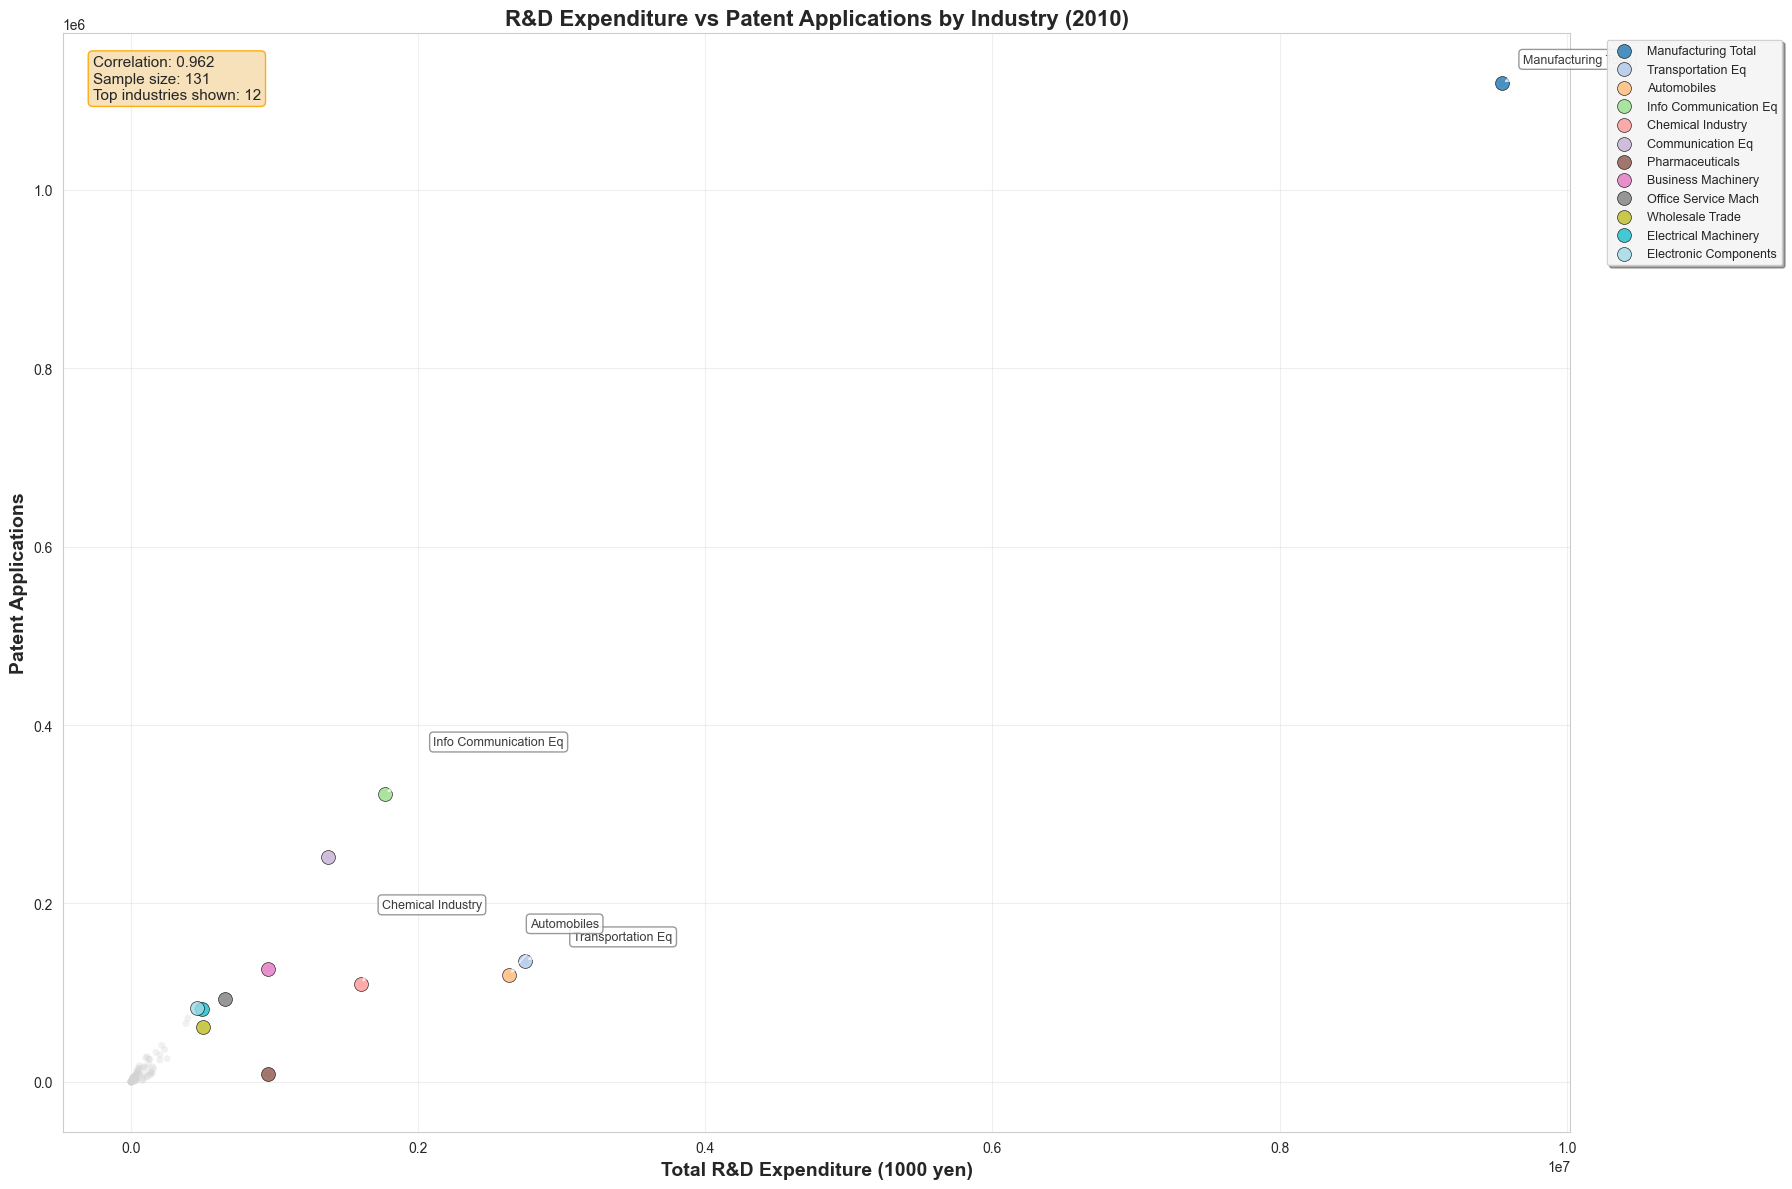


Top 10 industries by R&D expenditure in 2010:
--------------------------------------------------------------------------------
 1. Manufacturing Total            R&D:       9,548,493 Patents:  1,119,357
 2. Transportation Eq              R&D:       2,742,678 Patents:    135,537
 3. Automobiles                    R&D:       2,633,781 Patents:    119,273
 4. Info Communication Eq          R&D:       1,766,784 Patents:    322,876
 5. Chemical Industry              R&D:       1,601,339 Patents:    109,175
 6. Communication Eq               R&D:       1,371,812 Patents:    251,624
 7. Pharmaceuticals                R&D:         951,186 Patents:      8,314
 8. Business Machinery             R&D:         950,736 Patents:    126,418
 9. Office Service Mach            R&D:         655,152 Patents:     92,489
10. Wholesale Trade                R&D:         501,495 Patents:     61,401
Plot saved: plots/rd_patent_scatter_2010.png

Processing year 2015...


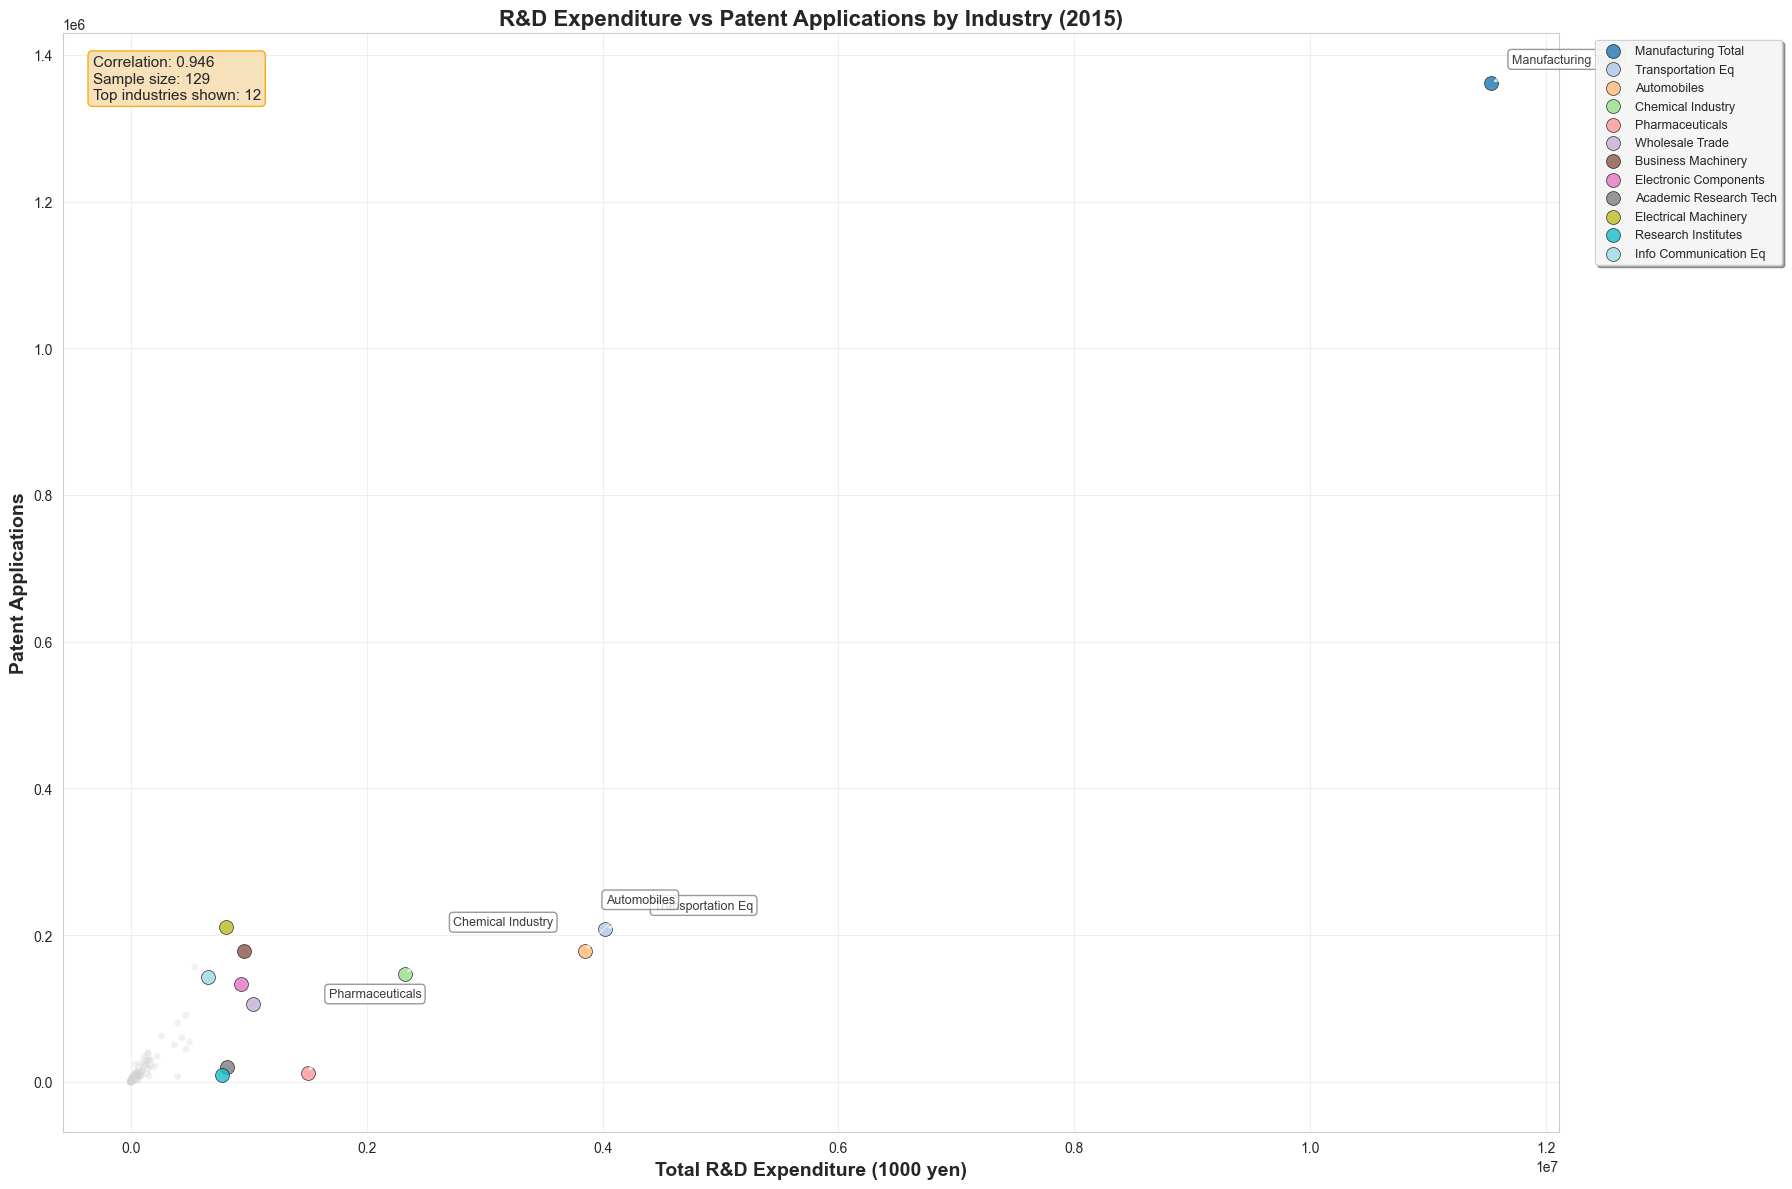


Top 10 industries by R&D expenditure in 2015:
--------------------------------------------------------------------------------
 1. Manufacturing Total            R&D:      11,530,426 Patents:  1,361,019
 2. Transportation Eq              R&D:       4,024,331 Patents:    207,674
 3. Automobiles                    R&D:       3,850,174 Patents:    177,782
 4. Chemical Industry              R&D:       2,321,738 Patents:    146,914
 5. Pharmaceuticals                R&D:       1,501,208 Patents:     11,436
 6. Wholesale Trade                R&D:       1,040,626 Patents:    106,492
 7. Business Machinery             R&D:         962,929 Patents:    177,834
 8. Electronic Components          R&D:         937,569 Patents:    133,514
 9. Academic Research Tech         R&D:         814,582 Patents:     19,576
10. Electrical Machinery           R&D:         806,951 Patents:    211,461
Plot saved: plots/rd_patent_scatter_2015.png

Processing year 2020...


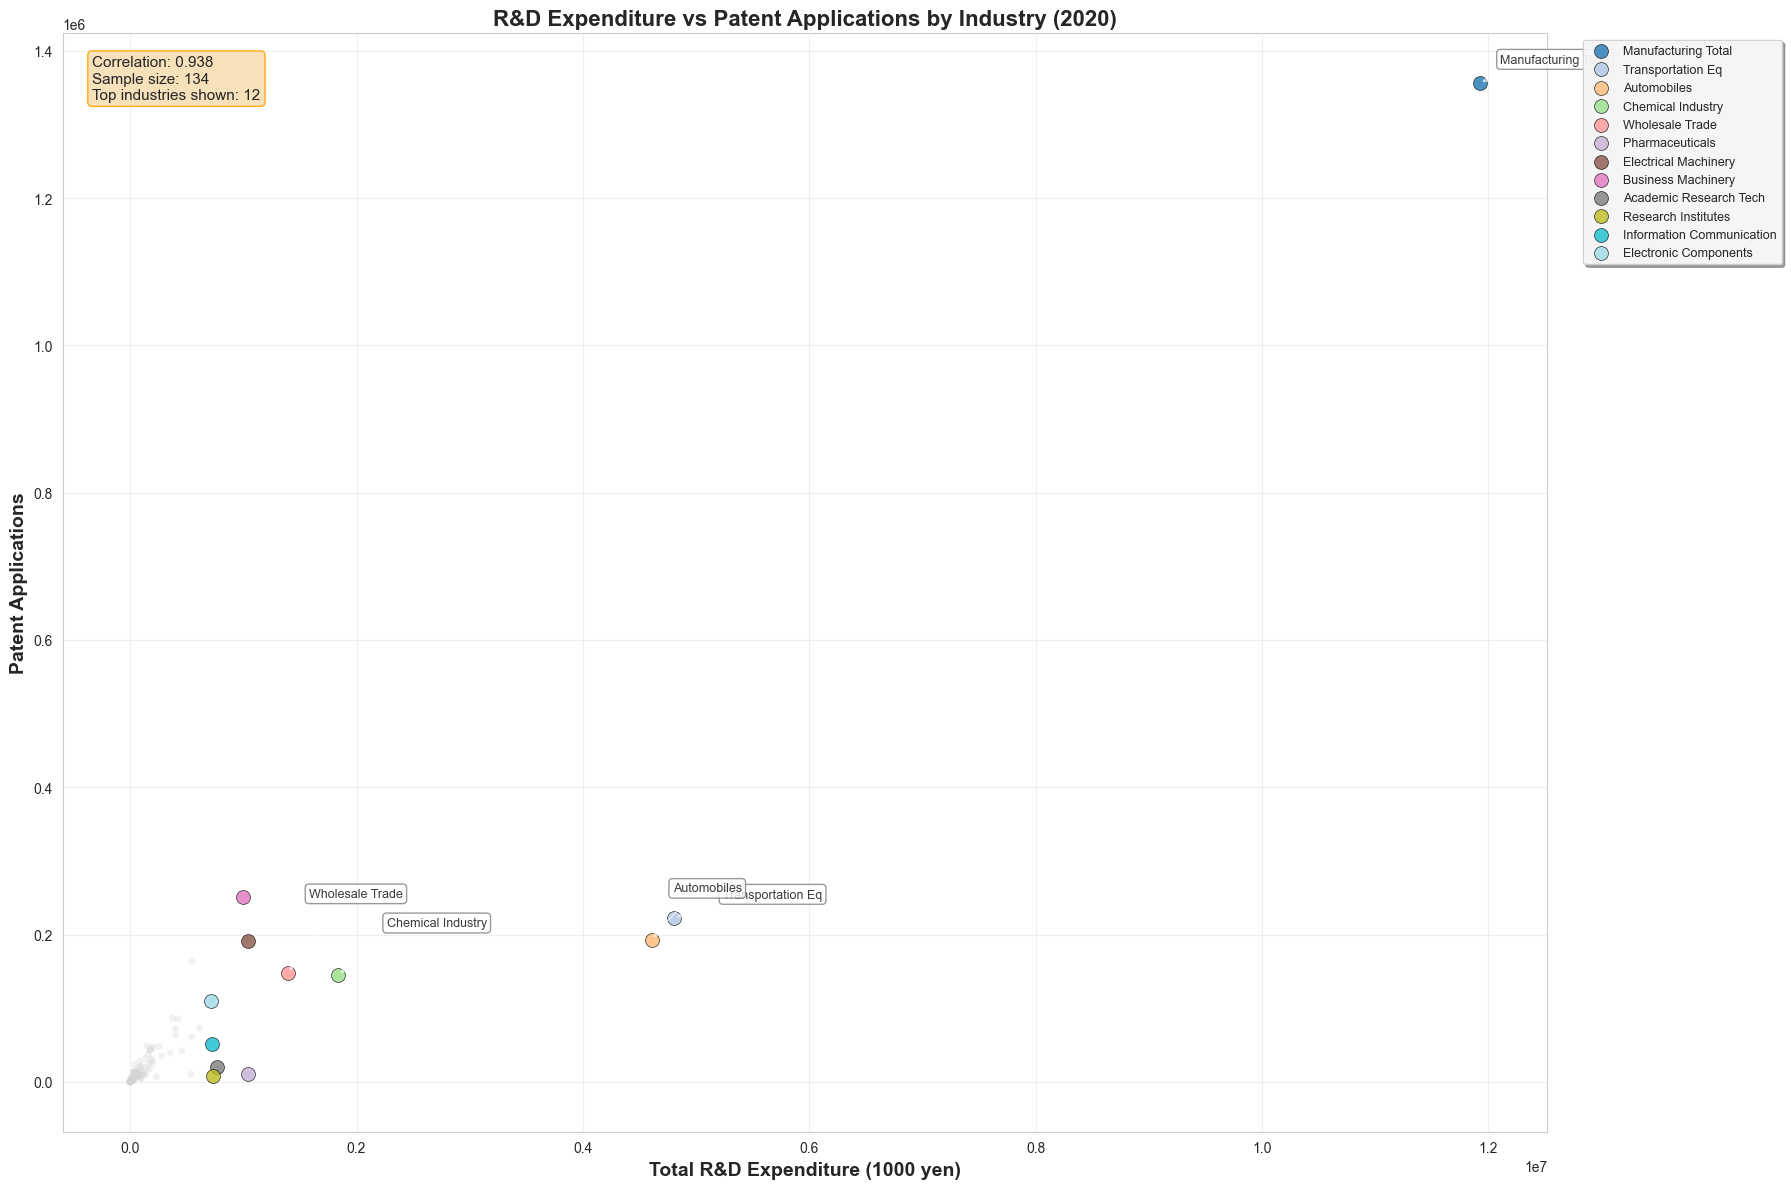


Top 10 industries by R&D expenditure in 2020:
--------------------------------------------------------------------------------
 1. Manufacturing Total            R&D:      11,922,450 Patents:  1,355,877
 2. Transportation Eq              R&D:       4,807,918 Patents:    221,968
 3. Automobiles                    R&D:       4,609,141 Patents:    192,610
 4. Chemical Industry              R&D:       1,836,487 Patents:    145,263
 5. Wholesale Trade                R&D:       1,396,154 Patents:    147,411
 6. Pharmaceuticals                R&D:       1,039,052 Patents:     10,138
 7. Electrical Machinery           R&D:       1,037,758 Patents:    191,812
 8. Business Machinery             R&D:         994,637 Patents:    250,531
 9. Academic Research Tech         R&D:         769,149 Patents:     19,637
10. Research Institutes            R&D:         732,868 Patents:      8,552
Plot saved: plots/rd_patent_scatter_2020.png

All plots have been saved to the plots directory.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams
import os
import platform

# Define data file path
DATA_PATH = "/Users/kohsukesagara/Desktop/graspp-25S-innovation/notebooks/assignment_group/HW2/panel_data.csv"

# Font setup for better compatibility
def setup_font():
    """
    Set up fonts with better compatibility
    """
    # Use a more universal font that supports both English and Japanese
    plt.rcParams['font.family'] = ['Arial Unicode MS', 'DejaVu Sans', 'Liberation Sans']
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams['font.size'] = 10
    
    print("Font setup completed")

# Execute font setup
setup_font()
sns.set_style("whitegrid")

def load_and_preprocess_data(file_path):
    """
    Function to load data and perform basic preprocessing
    """
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Data file not found: {file_path}")
    
    try:
        df = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv(file_path, encoding='shift_jis')
        except UnicodeDecodeError:
            df = pd.read_csv(file_path, encoding='cp932')
    
    numeric_columns = ['company_count', 'randd_sales', 'randd_total', 
                      'patent_company_count', 'patent_count', 
                      'utility_company_count', 'utility_count',
                      'design_company_count', 'design_count']
    
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    print("Basic data information:")
    print(f"Data shape: {df.shape}")
    print(f"Year range: {df['year'].min()} - {df['year'].max()}")
    print(f"Number of industries: {df['industry'].nunique()}")
    
    return df

def create_industry_mapping():
    """
    Create a comprehensive mapping of industry codes to English names
    """
    industry_mapping = {
        '000': 'Total All Industries',
        'E': 'Manufacturing Total',
        'F': 'Electricity Gas',
        'G': 'Information Communication',
        'I1': 'Wholesale Trade',
        'I2': 'Retail Trade',
        'J1': 'Credit Card Finance',
        'K1': 'Equipment Rental',
        'L': 'Academic Research Tech',
        'M': 'Food Service',
        'N': 'Life Related Services',
        'R1': 'Other Services',
        'R2': 'Other Services 2',
        'Z': 'Other Industries',
        'C': 'Mining Quarrying',
        
        # Manufacturing industries
        '090': 'Food Manufacturing',
        '091': 'Livestock Food',
        '092': 'Marine Food',
        '093': 'Rice Flour Milling',
        '099': 'Other Food',
        '100': 'Beverages Tobacco Feed',
        '101': 'Beverages Alcohol',
        '102': 'Feed Fertilizer',
        '110': 'Textile Industry',
        '111': 'Spinning Thread',
        '112': 'Fabric Knit',
        '113': 'Dyeing Finishing',
        '114': 'Other Textiles',
        '115': 'Clothing',
        '119': 'Textile Products',
        '120': 'Wood Products',
        '121': 'Lumber Plywood',
        '129': 'Other Wood',
        '130': 'Furniture Equipment',
        '140': 'Pulp Paper',
        '141': 'Pulp Paper Mfg',
        '142': 'Paper Processing',
        '150': 'Printing',
        '160': 'Chemical Industry',
        '161': 'Inorganic Chemicals',
        '162': 'Organic Chemicals',
        '163': 'Oil Paint Detergent',
        '164': 'Pharmaceuticals',
        '169': 'Other Chemicals',
        '170': 'Petroleum Coal',
        '171': 'Oil Refining',
        '179': 'Other Petroleum',
        '180': 'Plastic Products',
        '190': 'Rubber Products',
        '191': 'Tires Tubes',
        '199': 'Other Rubber',
        '200': 'Leather Products',
        '210': 'Ceramics Stone',
        '211': 'Glass Products',
        '212': 'Cement Products',
        '219': 'Other Ceramics',
        '220': 'Iron Steel',
        '221': 'Steel Materials',
        '222': 'Steel Products',
        '230': 'Non-ferrous Metals',
        '231': 'Metal Refining',
        '232': 'Metal Processing',
        '240': 'Metal Products',
        '241': 'Construction Metal',
        '249': 'Other Metal',
        '250': 'General Machinery',
        '251': 'Boilers Engines',
        '252': 'Pumps Compressors',
        '253': 'Industrial Machinery',
        '259': 'Other General Mach',
        '260': 'Production Machinery',
        '261': 'Metal Processing Mach',
        '262': 'Special Industry Mach',
        '270': 'Business Machinery',
        '271': 'Office Service Mach',
        '273': 'Measuring Instruments',
        '274': 'Medical Equipment',
        '275': 'Optical Equipment',
        '276': 'Weapons',
        '280': 'Electronic Components',
        '290': 'Electrical Machinery',
        '291': 'Industrial Electric',
        '292': 'Consumer Electric',
        '293': 'Electronic Applications',
        '299': 'Other Electric',
        '300': 'Info Communication Eq',
        '301': 'Communication Eq',
        '302': 'Computer Equipment',
        '310': 'Transportation Eq',
        '311': 'Automobiles',
        '319': 'Other Transport',
        '320': 'Other Manufacturing',
        
        # Service industries
        '331': 'Electric Power',
        '341': 'Gas Supply',
        '391': 'Software',
        '392': 'Info Processing',
        '401': 'Internet Services',
        '411': 'Movie Video',
        '413': 'Newspapers',
        '414': 'Publishing',
        '511': 'Textile Wholesale',
        '512': 'Clothing Wholesale',
        '521': 'Agricultural Wholesale',
        '522': 'Food Wholesale',
        '531': 'Construction Materials',
        '532': 'Chemical Wholesale',
        '533': 'Petroleum Wholesale',
        '534': 'Steel Wholesale',
        '535': 'Non-ferrous Wholesale',
        '536': 'Recycling Wholesale',
        '541': 'Machinery Wholesale',
        '542': 'Auto Wholesale',
        '543': 'Electric Wholesale',
        '549': 'Other Machinery Whole',
        '551': 'Furniture Wholesale',
        '552': 'Pharma Cosmetics',
        '553': 'Paper Wholesale',
        '559': 'Other Wholesale',
        '570': 'Clothing Retail',
        '580': 'Food Retail',
        '591': 'Auto Retail',
        '593': 'Machinery Retail',
        '602': 'Furniture Retail',
        '603': 'Pharma Retail',
        '605': 'Fuel Retail',
        '609': 'Other Retail',
        '610': 'Mail Order Retail',
        '702': 'Industrial Rental',
        '703': 'Office Rental',
        '704': 'Auto Rental',
        '708': 'Other Rental',
        '710': 'Research Institutes',
        '726': 'Design',
        '728': 'Engineering',
        '730': 'Advertising',
        '743': 'Machine Design',
        '744': 'Product Testing',
        '745': 'Measurement Cert',
        '746': 'Photography',
        '760': 'Restaurants',
        '770': 'Takeout Delivery',
        '781': 'Laundry',
        '789': 'Other Personal Care',
        '796': 'Wedding Funeral',
        '797': 'Photo Processing',
        '798': 'Other Life Services',
        '801': 'Movie Theaters',
        '803': 'Golf Courses',
        '804': 'Sports Facilities',
        '805': 'Amusement Parks',
        '880': 'Waste Management',
        '900': 'Machine Repair',
        '911': 'Job Placement',
        '912': 'Temp Staffing',
        '927': 'Display',
        '928': 'Telemarketing',
        '929': 'Other Business Serv'
    }
    
    return industry_mapping

def get_display_name(industry_id, industry_name, mapping):
    """
    Get display name for industry
    """
    if industry_id in mapping:
        return mapping[industry_id]
    else:
        # Clean up the original name and limit length
        clean_name = str(industry_name).replace('Unknown Industry', 'Other')
        if len(clean_name) > 25:
            return clean_name[:22] + "..."
        return clean_name

def plot_year_scatter(df, year, save_path=None):
    """
    Create scatter plot for a specific year with industry labels
    """
    plt.figure(figsize=(18, 12))
    
    # Filter data for the specific year
    year_data = df[df['year'] == year].copy()
    
    # Remove total data and filter valid data
    year_data = year_data[year_data['industry_id'] != '000']
    year_data = year_data.dropna(subset=['randd_total', 'patent_count'])
    year_data = year_data[(year_data['randd_total'] > 0) & (year_data['patent_count'] > 0)]
    
    if year_data.empty:
        print(f"No valid data found for year {year}")
        return
    
    # Get industry mapping
    industry_mapping = create_industry_mapping()
    year_data['industry_display'] = year_data.apply(
        lambda row: get_display_name(row['industry_id'], row['industry'], industry_mapping), axis=1
    )
    
    # Select top industries by R&D expenditure for better visibility
    top_industries = year_data.nlargest(12, 'randd_total')
    
    # Create color map for industries
    unique_industries = top_industries['industry_display'].unique()
    colors = plt.cm.tab20(np.linspace(0, 1, len(unique_industries)))
    color_map = dict(zip(unique_industries, colors))
    
    # Plot all data points in light gray first
    plt.scatter(year_data['randd_total'], year_data['patent_count'], 
               alpha=0.3, s=25, c='lightgray', edgecolors='none')
    
    # Plot top industries with colors and labels
    for industry in unique_industries:
        industry_data = top_industries[top_industries['industry_display'] == industry]
        if not industry_data.empty:
            plt.scatter(industry_data['randd_total'], industry_data['patent_count'], 
                       c=[color_map[industry]], label=industry, alpha=0.8, s=100, 
                       edgecolors='black', linewidth=0.5)
    
    # Add annotations for top 5 industries by R&D expenditure
    top_5 = top_industries.nlargest(5, 'randd_total')
    for i, (_, row) in enumerate(top_5.iterrows()):
        # Offset annotations to avoid overlap
        offset_x = 15 + (i % 2) * 20
        offset_y = 15 + (i // 2) * 20
        
        plt.annotate(row['industry_display'], 
                    (row['randd_total'], row['patent_count']),
                    xytext=(offset_x, offset_y), textcoords='offset points', 
                    fontsize=9, alpha=0.9,
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8, edgecolor='gray'),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.1', alpha=0.6))
    
    # Set labels and title with explicit English text
    plt.xlabel('Total R&D Expenditure (1000 yen)', fontsize=14, fontweight='bold')
    plt.ylabel('Patent Applications', fontsize=14, fontweight='bold')
    plt.title(f'R&D Expenditure vs Patent Applications by Industry ({year})', 
              fontsize=16, fontweight='bold')
    
    # Format axes
    plt.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
    plt.grid(True, alpha=0.3)
    
    # Add legend with better positioning
    legend = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9, 
                       frameon=True, fancybox=True, shadow=True)
    legend.get_frame().set_facecolor('white')
    legend.get_frame().set_alpha(0.9)
    
    # Add correlation information
    correlation = year_data['randd_total'].corr(year_data['patent_count'])
    info_text = f'Correlation: {correlation:.3f}\nSample size: {len(year_data)}\nTop industries shown: {len(unique_industries)}'
    plt.text(0.02, 0.98, info_text, 
             transform=plt.gca().transAxes, fontsize=11, 
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9, edgecolor='orange'),
             verticalalignment='top')
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
    
    plt.show()
    
    # Print top industries information
    print(f"\nTop 10 industries by R&D expenditure in {year}:")
    print("-" * 80)
    top_10_info = top_industries.nlargest(10, 'randd_total')[['industry_display', 'randd_total', 'patent_count']]
    for i, (_, row) in enumerate(top_10_info.iterrows(), 1):
        rd_amount = f"{row['randd_total']:,.0f}"
        patent_count = f"{row['patent_count']:,.0f}"
        print(f"{i:2d}. {row['industry_display']:<30} R&D: {rd_amount:>15} Patents: {patent_count:>10}")

def create_three_year_plots(data_path, output_dir="plots"):
    """
    Create scatter plots for 2010, 2015, and 2020
    """
    # Create output directory
    os.makedirs(output_dir, exist_ok=True)
    
    # Load data
    df = load_and_preprocess_data(data_path)
    
    # Target years
    years = [2010, 2015, 2020]
    
    print("\nCreating scatter plots for three years...")
    print("=" * 60)
    
    for year in years:
        print(f"\nProcessing year {year}...")
        
        # Check if data exists for this year
        year_check = df[df['year'] == year]
        if year_check.empty:
            print(f"No data available for year {year}")
            continue
        
        # Create plot
        save_path = f"{output_dir}/rd_patent_scatter_{year}.png"
        plot_year_scatter(df, year, save_path=save_path)
        print(f"Plot saved: {save_path}")
    
    print(f"\n{'='*60}")
    print(f"All plots have been saved to the {output_dir} directory.")
    
    return df

# Main execution
if __name__ == "__main__":
    DATA_PATH = "/Users/kohsukesagara/Desktop/graspp-25S-innovation/notebooks/assignment_group/HW2/panel_data.csv"
    
    try:
        # Create three year comparison plots
        df = create_three_year_plots(DATA_PATH)
        
    except FileNotFoundError as e:
        print(f"Error: {e}")
        print("Please set the correct file path in the DATA_PATH variable.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")


,Unnamed: 0,産業,研究開発_企業数,研究開発_売上高（百万円）,研究開発_研究開発費_計,研究開発_研究開発費_自社研究開発費（百万円）,研究開発_研究開発費_委託研究開発費（百万円）,研究開発_研究開発費_委託研究開発費（百万円）_うち、関係会社への委託_国内（百万円）,研究開発_研究開発費_委託研究開発費（百万円）_うち、関係会社への委託_海外（百万円）,研究開発_売上高研究開発費比率（％）,研究開発_受託研究費（百万円）,研究開発_受託研究費（百万円）_うち、関係会社からの受託_国内（百万円）,_受託研究費（百万円）_うち、関係会社からの受託_海外（百万円）,研究開発投資_企業数,研究開発投資_当期取得額（百万円）,能力開発_企業数,能力開発_能力開発費（百万円）
0,0,総合計,8520.0,361522745,14056254,11821045,2235209,946179,295944,3.89,1064379,81437.0,53539.0,1929.0,652596,8958.0,207770
1,1,合計,8317.0,354902742,14015608,11791562,2224046,945893,295912,3.95,1061650,81258.0,53539.0,1905.0,651011,8472.0,198820
2,2,鉱業、採石業、砂利採取業,9.0,ｘ,ｘ,ｘ,ｘ,ｘ,NaN,ｘ,14,1.0,NaN,3.0,ｘ,11.0,312
3,3,製造業,6205.0,243948228,11530426,9593437,1936989,915431,226692,4.73,251364,23116.0,46571.0,1604.0,542625,3788.0,101801
4,4,090食料品製造業,659.0,13615107,133238,128268,4970,872,105,0.98,347,102.0,NaN,113.0,10460,396.0,3856
5,5,091畜産食料品製造業,92.0,4255689,36049,35146,903,254,NaN,0.85,18,NaN,NaN,9.0,4911,79.0,945
6,6,092水産食料品製造業,73.0,641209,3698,3551,147,6,NaN,0.58,23,1.0,NaN,7.0,47,36.0,203
7,7,093精穀・製粉業,17.0,511374,4040,4037,3,NaN,NaN,0.79,4,NaN,NaN,4.0,25,12.0,116
8,8,099その他の食料品製造業,477.0,8206835,89451,85534,3917,612,105,1.09,302,101.0,NaN,93.0,5477,269.0,2592
9,9,100飲料・たばこ・飼料製造業,118.0,6332927,61355,59079,2276,80,NaN,0.97,414,NaN,NaN,37.0,2892,66.0,1103


In [ ]:
#Time series
import pandas as pd
df_time = pd.read_csv('/../../../graspp-25S-innovation/data/特許件数.csv')
df_time

df_patent = df_time[['特許数']].dropna()
df_patent

df_patent_change = df_patent[['特許数']].pct_change(1).multiply(100)
df_patent_change

In [ ]:
df_patent[['特許数']].plot()
df_patent_change[['特許数']].plot()